In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

Q10 = np.array([8400, 8600, 8800, 9000, 9200, 9400, 9600, 9800, 10000, 10200, 10400, 10600, 10700])
Q20 = np.array([9700, 9800, 10000, 10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 11900, 12000, 12200])
Q30 = np.array([10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000])
Q40 = np.array([10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000, 13200, 13400])

W10 = np.array([840, 850, 860, 863, 870, 875, 878, 880, 878, 875, 870, 860, 840])
W20 = np.array([975, 978, 982, 990, 1000, 1005, 1010, 1017, 1019, 1017, 1010, 1005, 1000, 987, 970])
W30 = np.array([1040, 1050, 1060, 1065, 1072, 1080, 1083, 1090, 1095, 1098, 1097, 1090, 1083, 1078, 1050])
W40 = np.array([1080, 1092, 1100, 1110, 1118, 1120, 1130, 1135, 1138, 1140, 1139, 1132, 1128, 1120, 1095])

P10 = np.array([8.6, 8.5, 8.5, 8.4, 8.3, 8.2, 7.8, 7.5, 7.2, 6.6, 6.0, 4.5, 3.0])
P20 = np.array([10.2, 10.1, 10.0, 9.8, 9.7, 9.6, 9.3, 9.1, 8.8, 8.5, 8.0, 7.3, 6.8, 6.3, 3.5])
P30 = np.array([10.7, 10.6, 10.55, 10.5, 10.5, 10.3, 10.2, 9.8, 9.6, 9.3, 9.0, 8.5, 7.8, 6.7, 3.7])
P40 = np.array([11.1, 11.0, 10.9, 10.85, 10.8, 10.5, 10.4, 10.2, 9.9, 9.5, 9.2, 8.5, 8.0, 7.0, 4.0])

def generate_2list(input_list, input_list2):
    result = [[item, item2] for item, item2 in zip(input_list, input_list2)]
    return result

def generate_2list_with_x(input_list, input_list2, x):
    result = [[item, item2, x] for item, item2 in zip(input_list, input_list2)]
    return result

def generate_3list(input_list, input_list2, input_list3):
    result = [[item, item2, item3] for item, item2, item3 in zip(input_list, input_list2, input_list3)]
    return result

def generate_3list_with_x(input_list, input_list2, input_list3, x):
    result = [[item, item2, item3, x] for item, item2, item3 in zip(input_list, input_list2, input_list3)]
    return result
    
def generate_list_with_x(input_list, x):
    result = [[item, x] for item in input_list]
    return result

def merge_and_sort_lists(*lists):
    # 여러 리스트를 하나로 합치기
    merged_list = []
    for lst in lists:
        merged_list.extend(lst)
    
    # 합친 리스트 정렬하기
    merged_list.sort()
    
    return merged_list

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# 2. Q와 W의 관계식 도출 (피팅)
def poly_func(X, a, b, c, d, e, f):
    x, y = X
    return a * x**2 + b * y**2 + c * x * y + d * x + e * y + f 

def mono_func(x, a, b):
    return a * x + b 

In [3]:
Q10=[8400, 8600, 8800, 9000, 9200, 9400, 9600, 9800, 10000, 10200, 10400, 10600, 10700]
P10=[8.6, 8.5, 8.5, 8.4, 8.3, 8.2, 7.8, 7.5, 7.2, 6.6, 6.0, 4.5, 3.0]
Q20=[9700, 9800, 10000, 10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 11900, 12000, 12200]
P20=[10.2, 10.1, 10.0, 9.8, 9.7, 9.6, 9.3, 9.1, 8.8, 8.5, 8.0, 7.3, 6.8, 6.3, 3.5]
Q30=[10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000]
P30=[10.7, 10.6, 10.55, 10.5, 10.5, 10.3, 10.2, 9.8, 9.6, 9.3, 9.0, 8.5, 7.8, 6.7, 3.7]


In [4]:
Q12=[8660, 8840, 9040, 9240, 9440, 9640, 9840, 10040, 10240, 10440, 10640, 10860, 10960]
P12=[8.92, 8.82, 8.80, 8.68, 8.58, 8.48, 8.10, 7.82, 7.52, 6.98, 6.40, 4.96, 3.66]
Q22=[9800, 9920, 10120, 10320, 10520, 10720, 10920, 11120, 11320, 11520, 11720, 11920, 12040, 12160, 12360]
P22=[10.3, 10.2, 10.11, 9.94, 9.86, 9.74, 9.48, 9.24, 8.96, 8.66, 8.2, 7.54, 7.0, 6.38, 3.54]
Q32=[10280, 10480, 10680, 10880, 11080, 11280, 11480, 11680, 11880, 12080, 12280, 12480, 12680, 12880, 13080]
P32=[10.78, 10.68, 10.62, 10.57, 10.56, 10.34, 10.24, 9.88, 9.66, 9.34, 9.04, 8.5, 7.84, 6.76, 3.76]

In [5]:
Q14=[8920, 9080, 9280, 9480, 9680, 9880, 10080, 10280, 10480, 10680, 10880, 11120, 11220]
P14=[9.24, 9.14, 9.1, 8.96, 8.86, 8.76, 8.4, 8.14, 7.84, 7.36, 6.8, 5.42, 4.32]
Q24=[9900, 10040, 10240, 10440, 10640, 10840, 11040, 11240, 11440, 11640, 11840, 12040, 12180, 12320, 12520]
P24=[10.4, 10.3, 10.22, 10.08, 10.02, 9.88, 9.66, 9.38, 9.12, 8.82, 8.4, 7.78, 7.2, 6.46, 3.58]
Q34=[10360, 10560, 10760, 10960, 11160, 11360, 11560, 11760, 11960, 12160, 12360, 12560, 12760, 12960, 13160]
P34=[10.86, 10.76, 10.69, 10.64, 10.62, 10.38, 10.28, 9.96, 9.72, 9.38, 9.08, 8.5, 7.88, 6.82, 3.82]

In [6]:
Q16=[9180, 9320, 9520, 9720, 9920, 10120, 10320, 10520, 10720, 10920, 11120, 11380, 11480]
P16=[9.56, 9.46, 9.4, 9.24, 9.14, 9.04, 8.7, 8.46, 8.16, 7.74, 7.2, 5.88, 4.98]
Q26=[10000, 10160, 10360, 10560, 10760, 10960, 11160, 11360, 11560, 11760, 11960, 12160, 12320, 12480, 12680]
P26=[10.5, 10.4, 10.33, 10.22, 10.18, 10.02, 9.84, 9.52, 9.28, 8.98, 8.6, 8.02, 7.4, 6.54, 3.62]
Q36=[10440, 10640, 10840, 11040, 11240, 11440, 11640, 11840, 12040, 12240, 12440, 12640, 12840, 13040, 13240]
P36=[10.94, 10.84, 10.76, 10.71, 10.68, 10.42, 10.32, 10.04, 9.78, 9.42, 9.12, 8.5, 7.92, 6.88, 3.88]

In [7]:
Q18=[9440, 9560, 9760, 9960, 10160, 10360, 10560, 10760, 10960, 11160, 11360, 11640, 11740]
P18=[9.88, 9.78, 9.7, 9.52, 9.42, 9.32, 9.0, 8.78, 8.48, 8.12, 7.6, 6.34, 5.64]
Q28=[10100, 10280, 10480, 10680, 10880, 11080, 11280, 11480, 11680, 11880, 12080, 12280, 12460, 12640, 12840]
P28=[10.6, 10.5, 10.44, 10.36, 10.34, 10.16, 10.02, 9.66, 9.44, 9.14, 8.8, 8.26, 7.6, 6.62, 3.66]
Q38=[10520, 10720, 10920, 11120, 11320, 11520, 11720, 11920, 12120, 12320, 12520, 12720, 12920, 13120, 13320]
P38=[11.02, 10.92, 10.83, 10.78, 10.74, 10.46, 10.36, 10.12, 9.84, 9.46, 9.16, 8.5, 7.96, 6.94, 3.94]
Q40=[10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000, 13200, 13400]
P40=[11.1, 11.0, 10.9, 10.85, 10.8, 10.5, 10.4, 10.2, 9.9, 9.5, 9.2, 8.5, 8.0, 7.0, 4.0]

In [8]:
W10 = [840, 850, 860, 863, 870, 875, 878, 880, 878, 875, 870, 860, 840]
W12 = [867, 875.6, 884.4, 888.4, 896, 901, 904.4, 907.4, 906.2, 903.4, 898, 889, 872, 197.4]
W14 = [894, 901.2, 908.8, 913.8, 922, 927, 930.8, 934.8, 934.4, 931.8, 926, 918, 904]
W16 = [921, 926.8, 933.2, 939.2, 948, 953, 957.2, 962.2, 962.6, 960.2, 954, 947, 936]
W18 = [948, 952.4, 957.6, 964.6, 974, 979, 983.6, 989.6, 990.8, 988.6, 982, 976, 968]

W20 = [975, 978, 982, 990, 1000, 1005, 1010, 1017, 1019, 1017, 1010, 1005, 1000, 987, 970]
W22 = [988, 992.4, 997.6, 1005, 1014.4, 1020, 1024.6, 1031.6, 1034.2, 1033.2, 1027.4, 1022, 1016.6, 1005.2, 986]
W24 = [1001, 1006.8, 1013.2, 1020, 1028.8, 1035, 1039.2, 1046.2, 1049.4, 1049.4, 1044.8, 1039, 1033.2, 1023.4, 1002]
W26 = [1014, 1021.2, 1028.8, 1035, 1043.2, 1050, 1053.8, 1060.8, 1064.6, 1065.6, 1062.2, 1056, 1049.8, 1041.6, 1018]
W28 = [1027, 1035.6, 1044.4, 1050, 1057.6, 1065, 1068.4, 1075.4, 1079.8, 1081.8, 1079.6, 1073, 1066.4, 1059.8, 1034]

W30 = [1040, 1050, 1060, 1065, 1072, 1080, 1083, 1090, 1095, 1098, 1097, 1090, 1083, 1078, 1050]
W32 = [1048, 1058.4, 1068, 1074, 1081.2, 1088, 1092.4, 1099, 1103.6, 1106.4, 1105.4, 1098.4, 1092, 1086.4, 1059]
W34 = [1056, 1066.8, 1076, 1083, 1090.4, 1096, 1101.8, 1108, 1112.2, 1114.8, 1113.8, 1106.8, 1101, 1094.8, 1068]
W36 = [1064, 1075.2, 1084, 1092, 1099.6, 1104, 1111.2, 1117, 1120.8, 1123.2, 1122.2, 1115.2, 1110, 1103.2, 1077]
W38 = [1072, 1083.6, 1092, 1101, 1108.8, 1112, 1120.6, 1126, 1129.4, 1131.6, 1130.6, 1123.6, 1119, 1111.6, 1086]
W40 = [1080, 1092, 1100, 1110, 1118, 1120, 1130, 1135, 1138, 1140, 1139, 1132, 1128, 1120, 1095]

In [9]:
L10 = generate_2list_with_x(Q10, P10, 10)
L12 = generate_2list_with_x(Q12, P12, 12)
L14 = generate_2list_with_x(Q14, P14, 14)
L16 = generate_2list_with_x(Q16, P16, 16)
L18 = generate_2list_with_x(Q18, P18, 18)
L20 = generate_2list_with_x(Q20, P20, 20)

L22 = generate_2list_with_x(Q22, P22, 22)
L24 = generate_2list_with_x(Q24, P24, 24)
L26 = generate_2list_with_x(Q26, P26, 26)
L28 = generate_2list_with_x(Q28, P28, 28)
L30 = generate_2list_with_x(Q30, P30, 20)

L32 = generate_2list_with_x(Q32, P32, 32)
L34 = generate_2list_with_x(Q34, P34, 34)
L36 = generate_2list_with_x(Q36, P36, 36)
L38 = generate_2list_with_x(Q38, P38, 38)
L40 = generate_2list_with_x(Q40, P40, 40)

In [174]:
def makedots(L, igv, clr):

    Q = np.array(L[:,0])
    P = np.array(L[:,1])
    
    angle = []
    for i in Q:
        angle.append(igv)
    angle = np.array(angle)
    
    # curve_fit을 사용하여 피팅
    params, covariance = curve_fit(poly_func, (Q,angle), P)
    a, b, c, d, e, f= params
    
    # 3. 관계식을 바탕으로 난수 생성
    num_samples = 100
    Q_random = np.random.normal(np.mean(Q), np.std(Q), num_samples)
    angleList = []
    for i in Q_random:
        angleList.append(igv)
    angleList = np.array(angleList)
    
    
    P_random = poly_func((Q_random, angleList), a, b, c, d, e, f) + np.random.normal(0, np.std(P - poly_func((Q,angle),a, b, c, d, e, f)), num_samples)



    plt.xlim([6000, 14000])
    plt.ylim([0, 16]) 
    # 4. 결과 시각화    
    # 생성된 난수 데이터 시각화
    plt.scatter(Q_random, P_random, color='gray', alpha=0.5)
   

    plt.scatter(Q, P, color=clr, alpha=0.3)

    Q_fit = np.linspace(min(Q), max(Q), 100)
    
    angleList = []
    for i in Q_fit:
        angleList.append(igv)
        
    angleList = np.array(angleList)
    W_fit = poly_func((Q_fit, angleList), a, b, c, d, e, f)
    plt.plot(Q_fit, W_fit, color=clr)

    # 축 레이블에 콤마 추가
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))
    plt.grid(color='black', linestyle='-', linewidth=0.1)


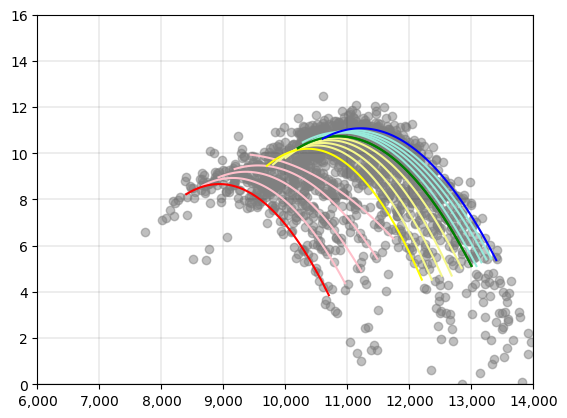

In [175]:
makedots(np.array(L12), 12, '#ffc0cb')
makedots(np.array(L14), 14, '#ffc0cb')
makedots(np.array(L16), 16, '#ffc0cb')
makedots(np.array(L18), 18, '#ffc0cb')
makedots(np.array(L10), 10, "red")


makedots(np.array(L22), 22, '#f5f88c')
makedots(np.array(L24), 24, '#f5f88c')
makedots(np.array(L26), 26, '#f5f88c')
makedots(np.array(L28), 28, '#f5f88c')
makedots(np.array(L20), 20, "yellow")

makedots(np.array(L32), 32, '#98ebdc')
makedots(np.array(L34), 34, '#98ebdc')
makedots(np.array(L36), 36, '#98ebdc')
makedots(np.array(L38), 38, '#98ebdc')
makedots(np.array(L30), 30, "green")

makedots(np.array(L40), 40, "blue")

plt.savefig('plot1.png')  # Save as a PNG file

In [185]:
import matplotlib.ticker as ticker

def makedots(L, igv, clr):

    Q = np.array(L[:,0])
    P = np.array(L[:,1])
    
    angle = []
    for i in Q:
        angle.append(igv)
    angle = np.array(angle)
    
    # curve_fit을 사용하여 피팅
    params, covariance = curve_fit(poly_func, (Q,angle), P)
    a, b, c, d, e, f= params
    
    # 3. 관계식을 바탕으로 난수 생성
    num_samples = 100
    Q_random = np.random.normal(np.mean(Q), np.std(Q), num_samples)
    angleList = []
    for i in Q_random:
        angleList.append(igv)
    angleList = np.array(angleList)
    
    
    P_random = poly_func((Q_random, angleList), a, b, c, d, e, f) + np.random.normal(0, np.std(P - poly_func((Q,angle),a, b, c, d, e, f)), num_samples)

    plt.xlim([6000, 14000])
    plt.ylim([700, 1200]) 
    
    # 4. 결과 시각화    
    # 생성된 난수 데이터 시각화
    plt.scatter(Q_random, P_random, color='gray', alpha=0.5)
   

    #plt.scatter(Q, P, color=clr, alpha=0.3)

    Q_fit = np.linspace(min(Q), max(Q), 100)
    
    angleList = []
    for i in Q_fit:
        angleList.append(igv)
        
    angleList = np.array(angleList)
    W_fit = poly_func((Q_fit, angleList), a, b, c, d, e, f)
    plt.plot(Q_fit, W_fit, color=clr)

    # 축 레이블에 콤마 추가
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))
    plt.grid(color='black', linestyle='-', linewidth=0.1)







In [186]:
LQ10 = generate_2list_with_x(Q10, W10, 10)
LQ12 = generate_2list_with_x(Q12, W12, 12)
LQ14 = generate_2list_with_x(Q14, W14, 14)
LQ16 = generate_2list_with_x(Q16, W16, 16)
LQ18 = generate_2list_with_x(Q18, W18, 18)
LQ20 = generate_2list_with_x(Q20, W20, 20)

LQ22 = generate_2list_with_x(Q22, W22, 22)
LQ24 = generate_2list_with_x(Q24, W24, 24)
LQ26 = generate_2list_with_x(Q26, W26, 26)
LQ28 = generate_2list_with_x(Q28, W28, 28)
LQ30 = generate_2list_with_x(Q30, W30, 20)

LQ32 = generate_2list_with_x(Q32, W32, 32)
LQ34 = generate_2list_with_x(Q34, W34, 34)
LQ36 = generate_2list_with_x(Q36, W36, 36)
LQ38 = generate_2list_with_x(Q38, W38, 38)
LQ40 = generate_2list_with_x(Q40, W40, 40)

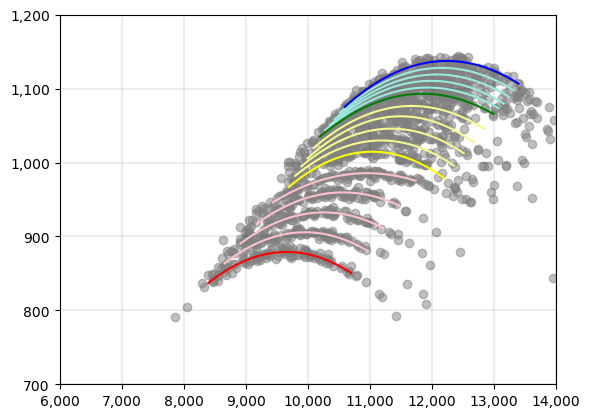

In [187]:
makedots(np.array(LQ12), 12, '#ffc0cb')
makedots(np.array(LQ14), 14, '#ffc0cb')
makedots(np.array(LQ16), 16, '#ffc0cb')
makedots(np.array(LQ18), 18, '#ffc0cb')
makedots(np.array(LQ10), 10, "red")


makedots(np.array(LQ22), 22, '#f5f88c')
makedots(np.array(LQ24), 24, '#f5f88c')
makedots(np.array(LQ26), 26, '#f5f88c')
makedots(np.array(LQ28), 28, '#f5f88c')
makedots(np.array(LQ20), 20, "yellow")


makedots(np.array(LQ32), 32, '#98ebdc')
makedots(np.array(LQ34), 34, '#98ebdc')
makedots(np.array(LQ36), 36, '#98ebdc')
makedots(np.array(LQ38), 38, '#98ebdc')
makedots(np.array(LQ30), 30, "green")

makedots(np.array(LQ40), 40, "blue")
#plt.savefig('plot8.png')  # Save as a PNG file

In [10]:
LQPW10 = generate_3list_with_x(Q10, W10, P10, 10)
LQPW12 = generate_3list_with_x(Q12, W12, P12, 12)
LQPW14 = generate_3list_with_x(Q14, W14, P14, 14)
LQPW16 = generate_3list_with_x(Q16, W16, P16, 16)
LQPW18 = generate_3list_with_x(Q18, W18, P18, 18)
LQPW20 = generate_3list_with_x(Q20, W20, P20, 20)

LQPW22 = generate_3list_with_x(Q22, W22, P22, 22)
LQPW24 = generate_3list_with_x(Q24, W24, P24, 24)
LQPW26 = generate_3list_with_x(Q26, W26, P26, 26)
LQPW28 = generate_3list_with_x(Q28, W28, P28, 28)
LQPW30 = generate_3list_with_x(Q30, W30, P30, 30)

LQPW32 = generate_3list_with_x(Q32, W32, P32, 32)
LQPW34 = generate_3list_with_x(Q34, W34, P34, 34)
LQPW36 = generate_3list_with_x(Q36, W36, P36, 36)
LQPW38 = generate_3list_with_x(Q38, W38, P38, 38)
LQPW40 = generate_3list_with_x(Q40, W40, P40, 40)

In [11]:
import csv

csv_file = 'C:/Users/user/Desktop/data1.csv'

# Function to save data to CSV
def save_to_csv(Q, W, P, A):
    with open(csv_file, 'a', newline='') as file:
        writer = csv.writer(file)
        for q, w, p, a in zip(Q, W, P, A):
            writer.writerow([q, w, p, a])

In [12]:
def makedots(L, igv, clr,ax):

    Q = np.array(L[:,0])
    W = np.array(L[:,1])
    P = np.array(L[:,2])
    
    angle = []
    for i in Q:
        angle.append(igv)
    angle = np.array(angle)
    
    # curve_fit을 사용하여 피팅
    params1, covariance = curve_fit(poly_func, (Q,angle), W)
    Wa, Wb, Wc, Wd, We, Wf= params1

        # curve_fit을 사용하여 피팅
    params2, covariance = curve_fit(poly_func, (Q,angle), P)
    Pa, Pb, Pc, Pd, Pe, Pf= params2
    
    # 3. 관계식을 바탕으로 난수 생성
    num_samples = 2000
    Q_random = np.random.normal(np.mean(Q), np.std(Q), num_samples)
    angleList = []
    for i in Q_random:
        angleList.append(igv)
    angleList = np.array(angleList)
        
    P_random = poly_func((Q_random, angleList), Pa, Pb, Pc, Pd, Pe, Pf) + np.random.normal(0, np.std(P - poly_func((Q,angle), Pa, Pb, Pc, Pd, Pe, Pf)), num_samples)
    W_random = poly_func((Q_random, angleList), Wa, Wb, Wc, Wd, We, Wf) + np.random.normal(0, np.std(W - poly_func((Q,angle), Wa, Wb, Wc, Wd, We, Wf)), num_samples)
    
    save_to_csv(Q_random, W_random, P_random, angleList)

    ax.scatter(Q_random,  angleList, W_random, color=clr, alpha=0.5)
    #ax.scatter(Q, angle, W, color="red")
    


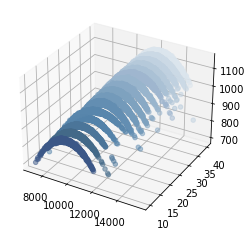

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Call makedots function with the same ax
makedots(np.array(LQPW10), 10, '#3b5787', ax)
makedots(np.array(LQPW12), 12, '#436988', ax)
makedots(np.array(LQPW14), 14, '#4b7599', ax)
makedots(np.array(LQPW16), 16, '#5382a9', ax)
makedots(np.array(LQPW18), 18, '#5886ac', ax)

makedots(np.array(LQPW20), 20, '#638eb2', ax)
makedots(np.array(LQPW22), 22, '#739aba', ax)
makedots(np.array(LQPW24), 24, '#7ea2bf', ax)
makedots(np.array(LQPW26), 26, '#89a9c5', ax)
makedots(np.array(LQPW28), 28, '#99b5cd', ax)

makedots(np.array(LQPW30), 30, '#9fb6cf', ax)
makedots(np.array(LQPW32), 32, '#aac1d5', ax)
makedots(np.array(LQPW34), 34, '#b5c9da', ax)
makedots(np.array(LQPW36), 36, '#c0d1e0', ax)
makedots(np.array(LQPW38), 38, '#cbd9e5', ax)

makedots(np.array(LQPW40), 40, '#dbe5ed', ax)

# Labels
#ax.set_xlabel('Q')
#ax.set_ylabel('igv')
#ax.set_zlabel('W')

# Show plot
plt.show()

#fig.savefig('plot9.png')  # Save as a PNG file

In [3]:
def makedots(L, igv, clr):

    Q = np.array(L[:,0])
    W = np.array(L[:,1])
    P = np.array(L[:,2])
    
    angle = []
    for i in Q:
        angle.append(igv)
    angle = np.array(angle)
    
    # curve_fit을 사용하여 피팅
    params1, covariance = curve_fit(poly_func, (Q,angle), W)
    Wa, Wb, Wc, Wd, We, Wf= params1

        # curve_fit을 사용하여 피팅
    params2, covariance = curve_fit(poly_func, (Q,angle), P)
    Pa, Pb, Pc, Pd, Pe, Pf= params2
    
    # 3. 관계식을 바탕으로 난수 생성
    num_samples = 100
    Q_random = np.random.normal(np.mean(Q), np.std(Q), num_samples)
    angleList = []
    for i in Q_random:
        angleList.append(igv)
    angleList = np.array(angleList)
    
    
    P_random = poly_func((Q_random, angleList), Pa, Pb, Pc, Pd, Pe, Pf) + np.random.normal(0, np.std(P - poly_func((Q,angle), Pa, Pb, Pc, Pd, Pe, Pf)), num_samples)
    W_random = poly_func((Q_random, angleList), Wa, Wb, Wc, Wd, We, Wf) + np.random.normal(0, np.std(P - poly_func((Q,angle), Wa, Wb, Wc, Wd, We, Wf)), num_samples)

    plt.scatter(W_random, Q_random, color=clr, alpha=0.5)
    plt.scatter(W, Q, color="red")
    
    # Scatter plot for the random points
    #ax.scatter(Q_random,  angleList, W_random, color=clr, alpha=0.5)
    
    # Scatter plot for the fixed points
    #ax.scatter(Q, P, W, color="red")
    


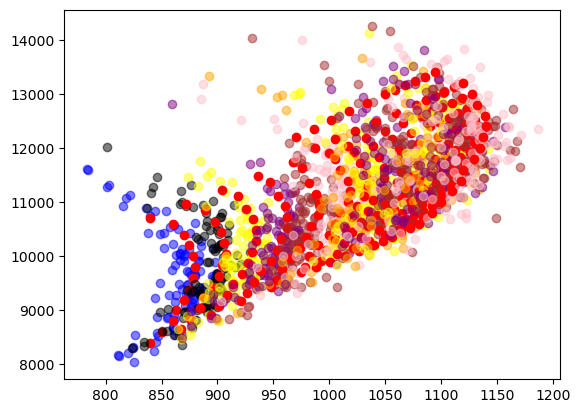

In [207]:
makedots(np.array(LQPW10), 10, "blue")
makedots(np.array(LQPW12), 12, "black")
makedots(np.array(LQPW14), 14, "yellow")
makedots(np.array(LQPW16), 16, "purple")
makedots(np.array(LQPW18), 18, "brown")

makedots(np.array(LQPW20), 20, "pink")
makedots(np.array(LQPW22), 22, "orange")
makedots(np.array(LQPW24), 24, "yellow")
makedots(np.array(LQPW26), 26, "purple")
makedots(np.array(LQPW28), 28, "brown")

makedots(np.array(LQPW30), 30, "pink")
makedots(np.array(LQPW32), 32, "orange")
makedots(np.array(LQPW34), 34, "yellow")
makedots(np.array(LQPW36), 36, "purple")
makedots(np.array(LQPW38), 38, "brown")

makedots(np.array(LQPW40), 40, "pink")

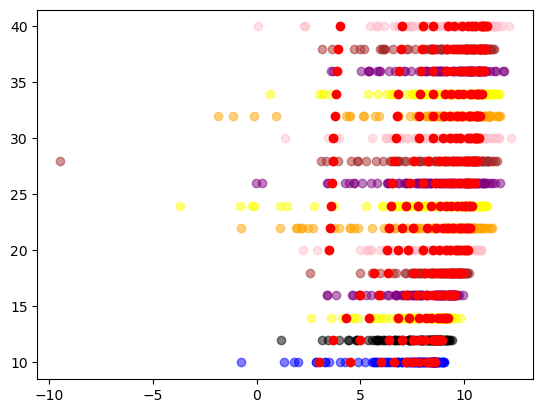

In [90]:
makedots(np.array(LQPW10), 10, "blue")
makedots(np.array(LQPW12), 12, "black")
makedots(np.array(LQPW14), 14, "yellow")
makedots(np.array(LQPW16), 16, "purple")
makedots(np.array(LQPW18), 18, "brown")

makedots(np.array(LQPW20), 20, "pink")
makedots(np.array(LQPW22), 22, "orange")
makedots(np.array(LQPW24), 24, "yellow")
makedots(np.array(LQPW26), 26, "purple")
makedots(np.array(LQPW28), 28, "brown")

makedots(np.array(LQPW30), 30, "pink")
makedots(np.array(LQPW32), 32, "orange")
makedots(np.array(LQPW34), 34, "yellow")
makedots(np.array(LQPW36), 36, "purple")
makedots(np.array(LQPW38), 38, "brown")

makedots(np.array(LQPW40), 40, "pink")

In [2]:
import openpyxl
import csv

def read_sheet(excel_file, sheet_name, col, row):
    result = []
    workbook = openpyxl.load_workbook(excel_file)
    sheet = workbook[sheet_name]
    
    # row 범위에 해당하는 행만 선택
    for r in range(row[0] + 1, row[1] + 1):  # openpyxl은 1부터 시작
        # col 범위에 해당하는 열만 선택
        selected_cols = [sheet.cell(row=r, column=c).value for c in range(col[0] + 1, col[1] + 1)]
        result.append(selected_cols)
    
    return result

def toFloat(nested_list):
    result = []
    for sublist in nested_list:
        float_sublist = [float(item) for item in sublist]
        result.append(float_sublist)
    return result

def interpolate_arrays(arr1, arr2, num_steps):
    result = []
    # 두 배열 사이의 간격을 계산
    for step in range(num_steps + 2):
        interpolated_array = []
        t = step / (num_steps + 1)  # 보간 파라미터
        for val1, val2 in zip(arr1, arr2):
            interpolated_value = val1 + t * (val2 - val1)
            interpolated_array.append(interpolated_value)
        result.append(interpolated_array)
    return result

def fillInsideArrays(arrays, num_steps):
    result = []
    for i in range(len(arrays) - 1):
        interpolated_data = interpolate_arrays(arrays[i], arrays[i + 1], num_steps)
        # 마지막 원소는 다음 보간에 포함되므로 제외하고 추가
        result.extend(interpolated_data[:-1])
    # 마지막 배열 추가
    result.append(arrays[-1])
    return result

def save_interpolated_data_to_csv(filename, interpolated_data):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        for data in interpolated_data:
            writer.writerows(data)

In [3]:
import math
def makeWarray(Array):
    result = []
    for sublist in Array:
        if len(sublist) > 4:  # 필요한 요소들이 존재하는지 확인
            arr1 = sublist[0:1]       # 0번째와 1번째 요소
            W = sublist[1] * sublist[2] *math.sqrt(3)*0.7 # 3번째와 4번째 요소 곱하기
            arr2 = sublist[3:7]       # 5번째 요소
            finalArr = arr1 + [W] + arr2  # 리스트로 결합
            result.append(finalArr)   # 결과 리스트에 추가
        else:
            result.append(sublist)  # 요소가 부족할 경우 원래 리스트를 추가
    return result

In [4]:
csv_file = 'C:/Users/user/Downloads/20240830_New_Performance Map.xlsx'
sheet = 'S-1'
i = 1

col = (0, 7)  # 2번째부터 3번째 열까지 (0부터 시작, 3은 포함되지 않음)
row = (1, 10)  # 3번째부터 5번째 행까지 (0부터 시작, 5는 포함되지 않음)
igv0 = read_sheet(csv_file, sheet, col, row)
igv0 = toFloat(igv0)
igv0 = makeWarray(igv0)

col = (8, 15) 
igv15 = read_sheet(csv_file, sheet, col, row)
igv15 = makeWarray(igv15)

col = (16, 23) 
igv30 = read_sheet(csv_file, sheet, col, row)
igv30 = toFloat(igv30)
igv30 = makeWarray(igv30)

col = (24, 31)
igv35 = read_sheet(csv_file, sheet, col, row)
igv35 = toFloat(igv35)
igv35 = makeWarray(igv35)


col = (32, 39)  
igv40 = read_sheet(csv_file, sheet, col, row)
igv40 = toFloat(igv40)
igv40 = makeWarray(igv40)

col = (40, 47)  
igv45 = read_sheet(csv_file, sheet, col, row)
igv45 = toFloat(igv45)
igv45 = makeWarray(igv45)

In [23]:
import matplotlib.pyplot as plt
import numpy as np

igv0 = np.array(igv0)   # Replace with actual data
igv15 = np.array(igv15)
igv30 = np.array(igv30)
igv35 = np.array(igv35)
igv40 = np.array(igv40)
igv45 = np.array(igv45)


In [24]:
import numpy as np

def interpolate_between_arrays(arr1, arr2, num_interpolations):
    # Ensure the arrays have the same shape
    if arr1.shape != arr2.shape:
        raise ValueError("Arrays must have the same shape for interpolation.")

    # Generate interpolation factors
    factors = np.linspace(0, 1, num_interpolations + 2)[1:-1]  # Avoid endpoints

    # Interpolate for each factor
    interpolated_datasets = []
    for factor in factors:
        interpolated = (1 - factor) * arr1 + factor * arr2
        interpolated_datasets.append(interpolated)
    
    return interpolated_datasets


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


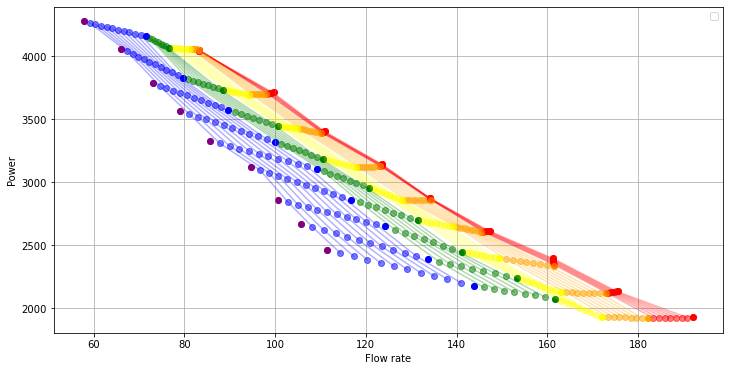

In [73]:
interpolated_data015 = interpolate_between_arrays(igv0, igv15, num_interpolations=7)
interpolated_data1530 = interpolate_between_arrays(igv15, igv30, num_interpolations=7)
interpolated_data3035 = interpolate_between_arrays(igv30, igv35, num_interpolations=7)
interpolated_data3540 = interpolate_between_arrays(igv35, igv40, num_interpolations=7)
interpolated_data4045 = interpolate_between_arrays(igv40, igv45, num_interpolations=10)
interpolated_data = interpolated_data015 +interpolated_data1530 +interpolated_data3035+ interpolated_data3540+interpolated_data4045
# Plotting
plt.figure(figsize=(12, 6))


for i, data in enumerate(interpolated_data015):
    x_values = data[:, 2]
    y_values = data[:, 1]
    plt.plot(x_values, y_values, 'o-', color='red', alpha=0.3)
    plt.scatter(x_values, y_values, color='red', alpha=0.3)
    
for i, data in enumerate(interpolated_data1530):
    x_values = data[:, 2]
    y_values = data[:, 1]
    plt.plot(x_values, y_values, 'o-', color='orange', alpha=0.3)
    plt.scatter(x_values, y_values, color='orange', alpha=0.3)

for i, data in enumerate(interpolated_data3035):
    x_values = data[:, 2]
    y_values = data[:, 1]
    plt.plot(x_values, y_values, 'o-', color='yellow', alpha=0.3)
    plt.scatter(x_values, y_values, color='yellow', alpha=0.3)    
    
for i, data in enumerate(interpolated_data3540):
    x_values = data[:, 2]
    y_values = data[:, 1]
    plt.plot(x_values, y_values, 'o-', color='green', alpha=0.3)
    plt.scatter(x_values, y_values, color='green', alpha=0.3)
    
for i, data in enumerate(interpolated_data4045):
    x_values = data[:, 2]
    y_values = data[:, 1]
    plt.plot(x_values, y_values, 'o-', color='blue', alpha=0.3)
    plt.scatter(x_values, y_values, color='blue', alpha=0.3)
    
# Plot original datasets for reference
x0, y0 = igv0[:, 2], igv0[:, 1]
x15, y15 = igv15[:, 2], igv15[:, 1]
x30, y30 = igv30[:, 2], igv30[:, 1]
x35, y35 = igv35[:, 2], igv35[:, 1]
x40, y40 = igv40[:, 2], igv40[:, 1]
x45, y45 = igv45[:, 2], igv45[:, 1]

plt.plot(x0, y0,  'o', color='red', alpha=0.5)
plt.plot(x15, y15, 'o', color='orange', alpha=0.5)
plt.plot(x30, y30, 'o', color='yellow', alpha=0.5)
plt.plot(x35, y35, 'o', color='green', alpha=0.5)
plt.plot(x40, y40, 'o', color='blue', alpha=0.5)
plt.plot(x45, y45, 'o', color='purple', alpha=0.5)

plt.scatter(x0, y0, color='red')
plt.scatter(x15, y15, color='orange')
plt.scatter(x30, y30, color='yellow')
plt.scatter(x35, y35, color='green')
plt.scatter(x40, y40, color='blue')
plt.scatter(x45, y45, color='purple')


        
        
# Setting up the plot
plt.xlabel('Flow rate')
plt.ylabel('Power')
plt.legend()
plt.grid(True)


# Save and show the plot
plt.savefig('interpolated_datasets_plot.png')
plt.show()